In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()
len(df)

14999

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

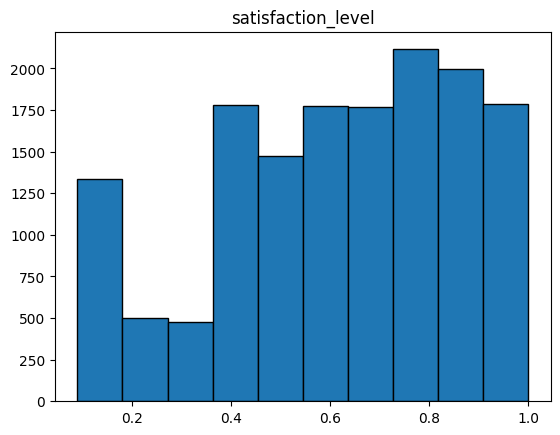

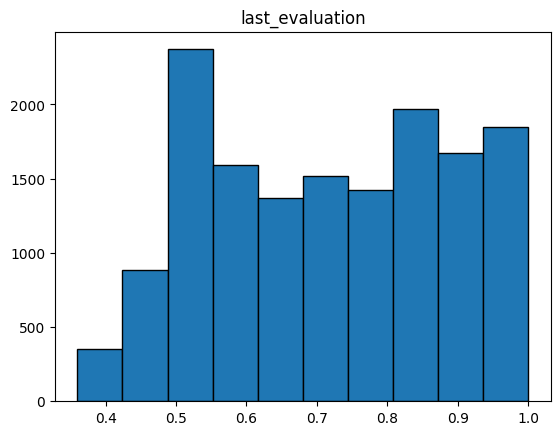

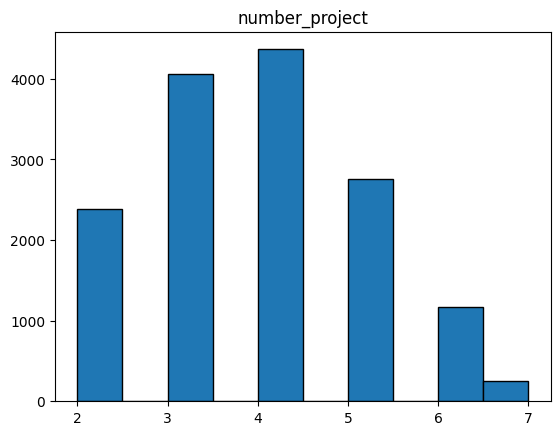

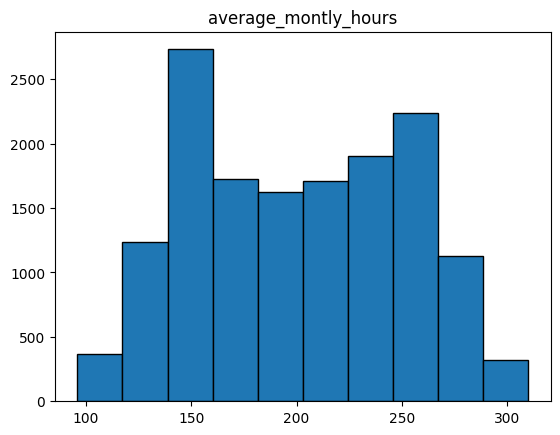

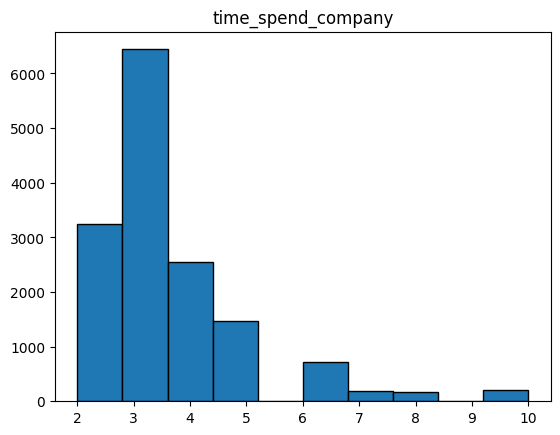

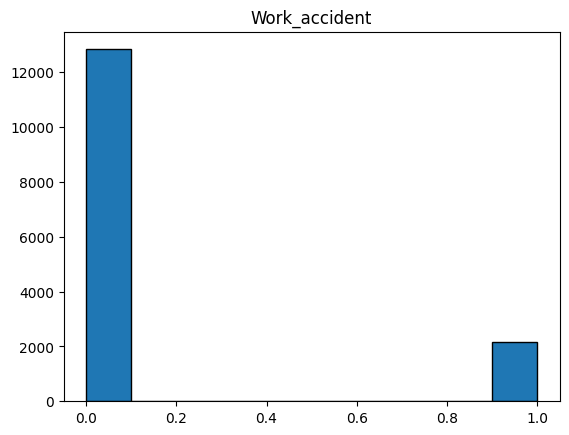

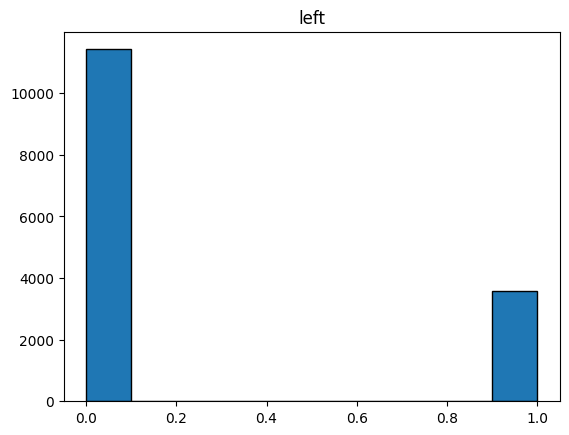

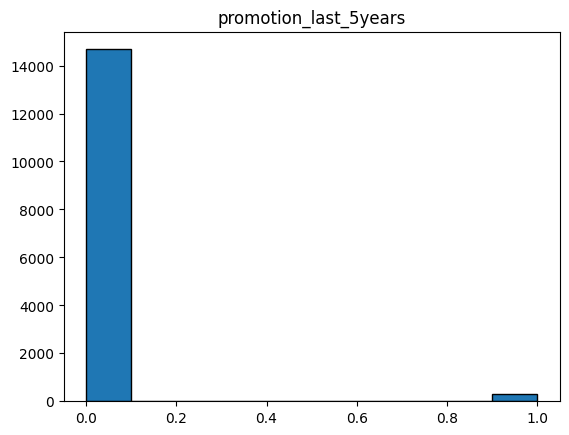

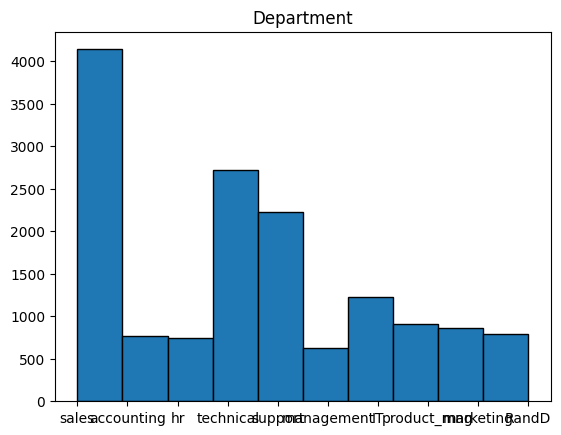

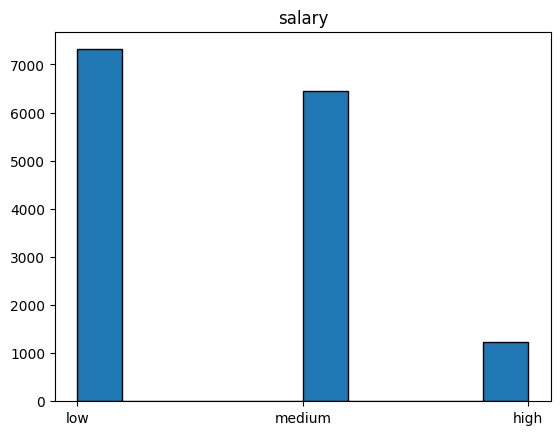

In [11]:
for col in df.columns:
    plt.hist(df[col],edgecolor='black', linewidth=1.0)
    plt.title(col)    
    plt.show()


In [12]:
left = df[df.left==1]
left.shape

(3571, 10)

In [13]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [14]:
df.select_dtypes(include=['float64', 'int64']).groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


So, we can conclude that the number of employers will leave the firm due to **satisfaction_level,average_monthly_hours,promotion_last_5years and of course salary**

<Axes: xlabel='salary'>

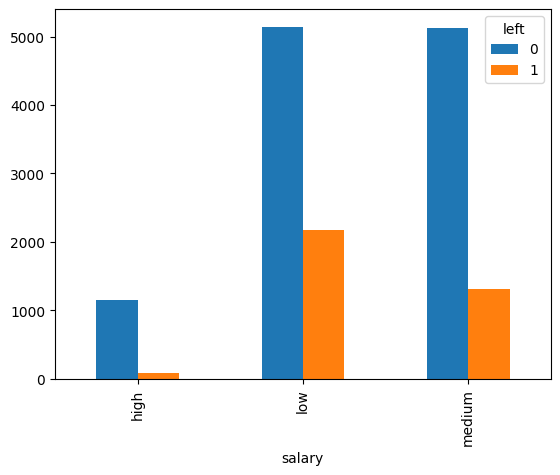

In [15]:
pd.crosstab(df.salary,df.left).plot(kind='bar')


<Axes: xlabel='Department'>

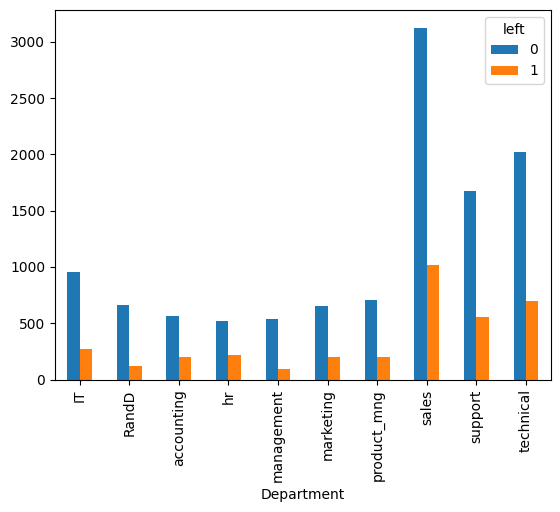

In [16]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [17]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary").astype(int)
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [18]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


**Training and spliting the data**

In [19]:
X = df_with_dummies.drop('salary',axis='columns')
y=df.left
X_train , X_test, y_train ,y_test = train_test_split(X,y,test_size=0.3)

In [20]:
len(X_train)

10499

In [21]:
len(X_test)

4500

**Training the model**

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

c:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
model.score(X_test,y_test) 

0.7795555555555556

In [24]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

**Plotting confusion matrix**

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[3195,  216],
       [ 776,  313]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      3411
           1       0.59      0.29      0.39      1089

    accuracy                           0.78      4500
   macro avg       0.70      0.61      0.63      4500
weighted avg       0.75      0.78      0.75      4500

